In [1]:
# Loading libraries
suppressPackageStartupMessages(library(scuttle))
suppressPackageStartupMessages(library(scran))
suppressPackageStartupMessages(library(scater))
suppressPackageStartupMessages(library(uwot))
suppressPackageStartupMessages(library(SingleCellExperiment))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(HDF5Array))
suppressPackageStartupMessages(library(GEDI))
suppressPackageStartupMessages(library(SeuratData))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(Seurat))
set.seed(42)                    

In [2]:
model <- readRDS("/home/arsham79/scratch/nsclc/results/GEDI_model.rds")

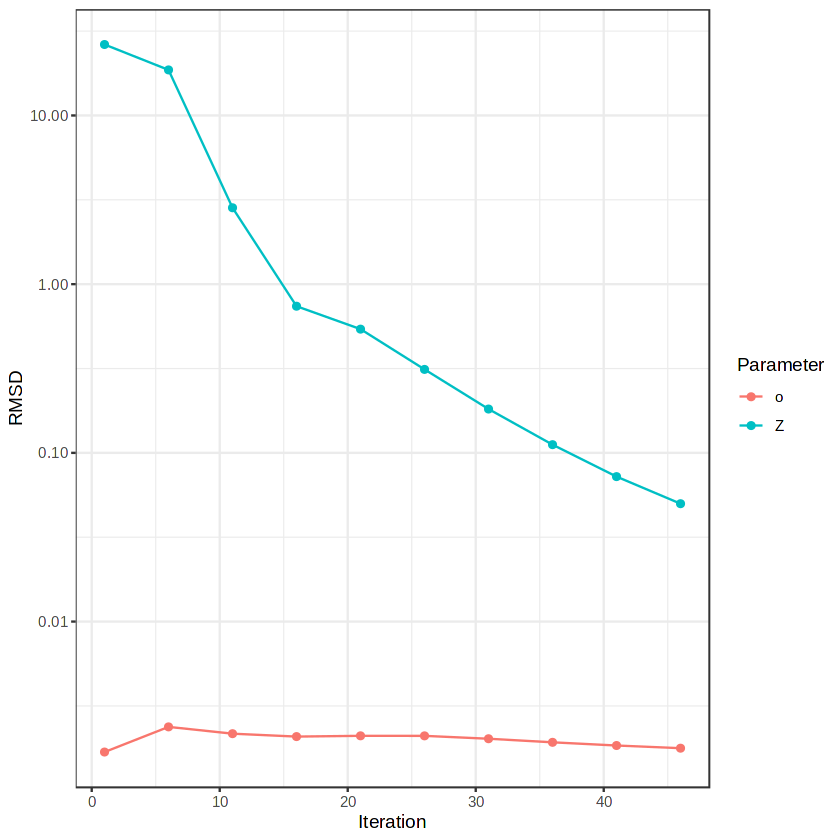

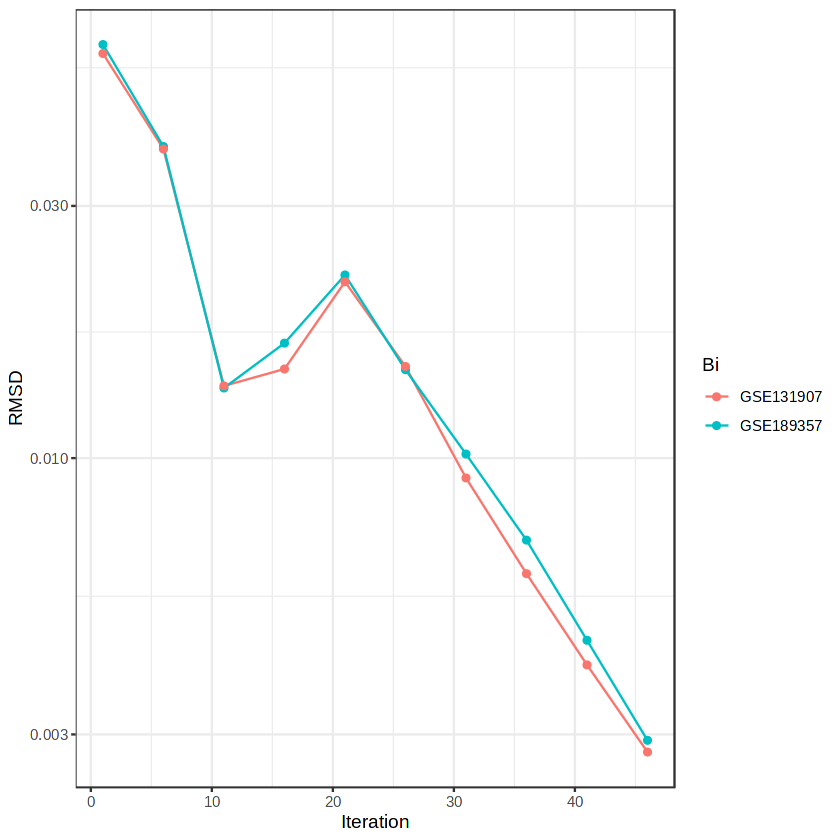

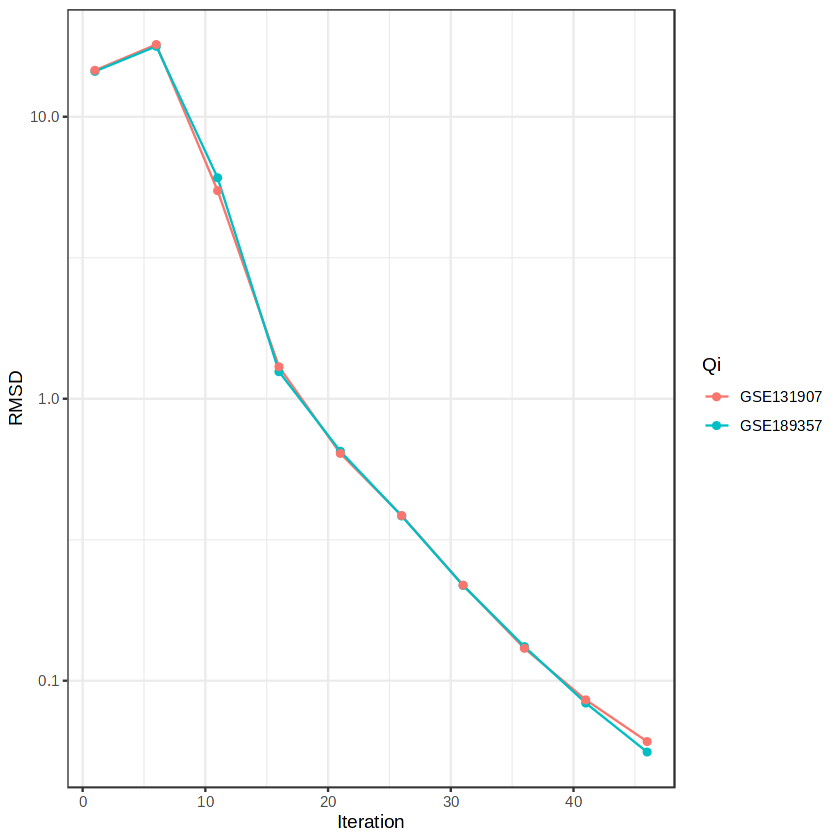

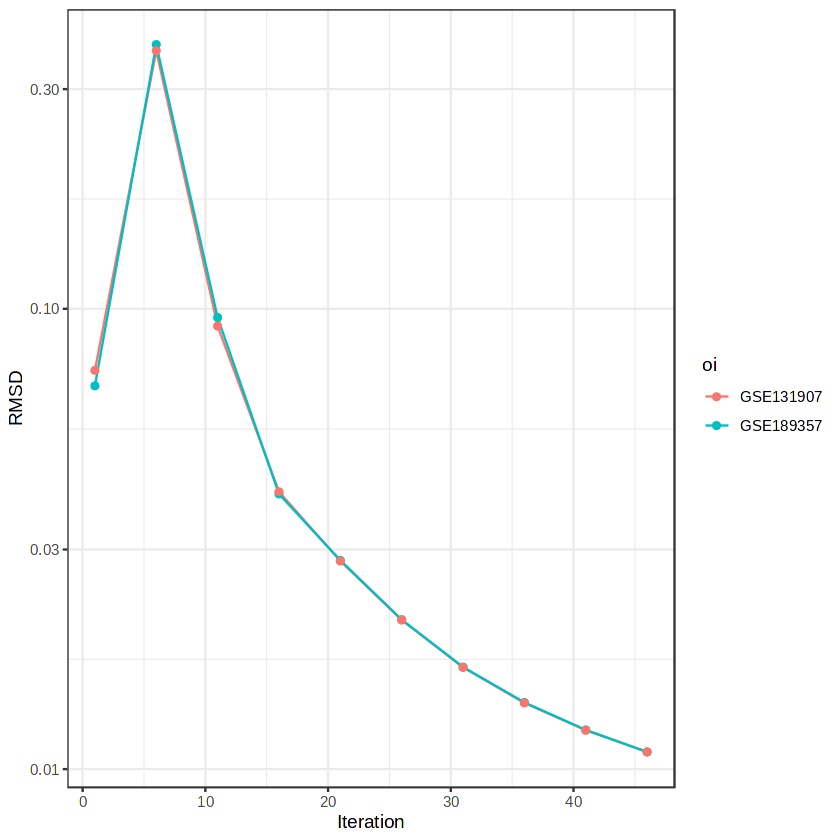

$ZAo

$Bi

$Qi

$oi

$si

$Rk
NULL

$sigma2


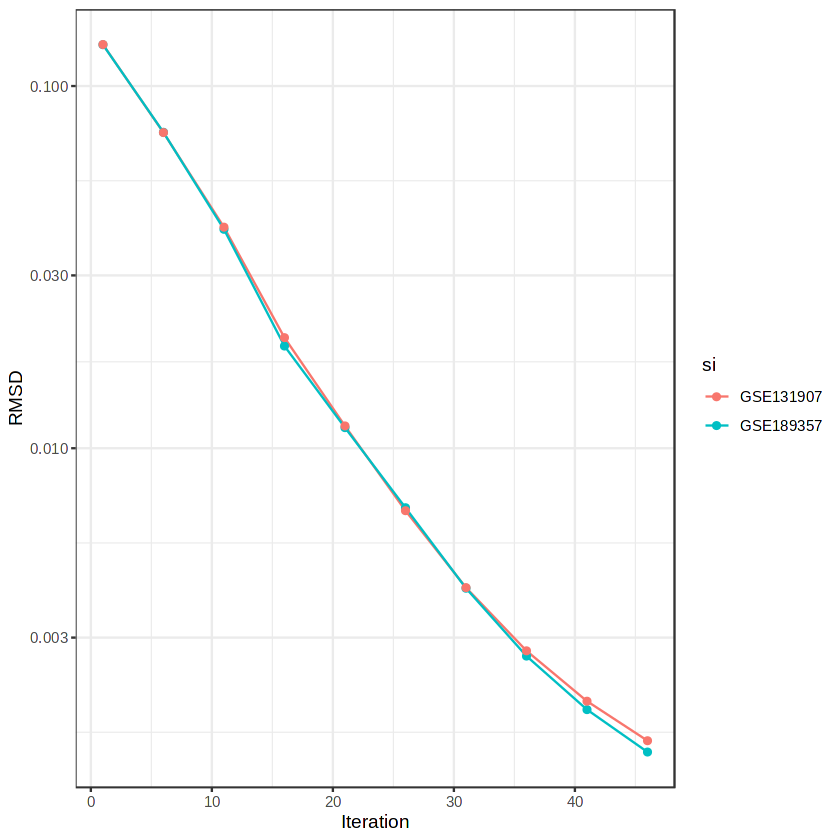

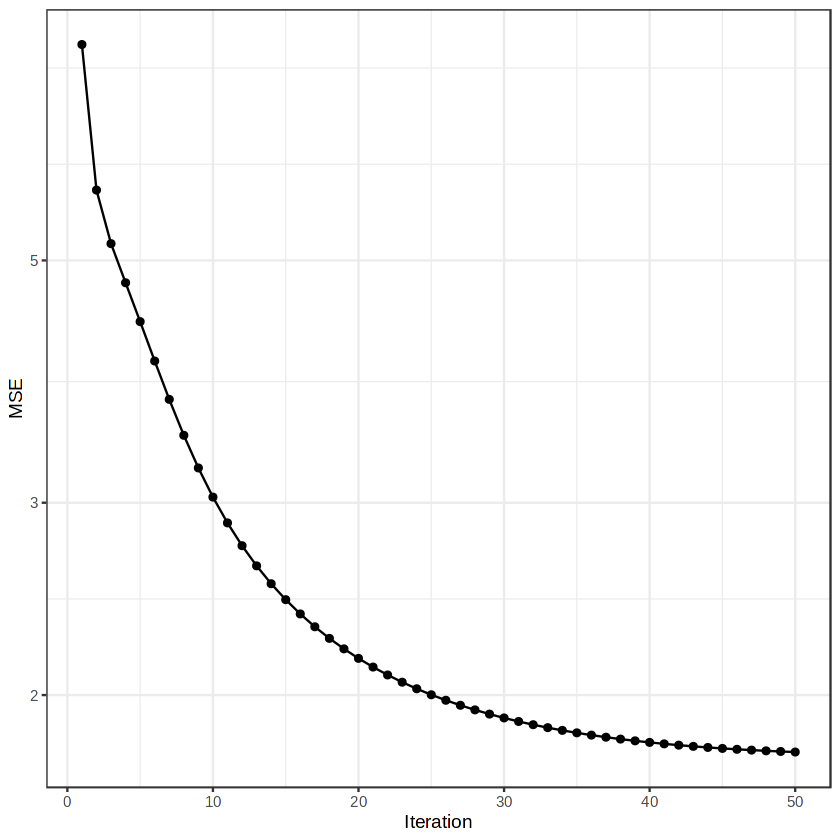

In [3]:
model$plotTracking()

In [4]:
svd_res <- svd.gedi( model )
embedding_res_svd<- svd_res$v %*% diag(svd_res$d)
colnames(embedding_res_svd)<- paste0("embedding", 1:ncol(embedding_res_svd))

# Generating umap of 2 dimensions
umap_2_res <- umap(embedding_res_svd, min_dist=0.01, metric="euclidean")
colnames(umap_2_res)<- paste0("umap", 1:2)
rownames(umap_2_res)<- model$aux$cellIDs
umap_2_res<- data.frame(umap_2_res)

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



In [10]:
model$aux$colData$GEO)

,orig.ident,nCount_RNA,nFeature_RNA,mt.percent,ID,barcodes,GSM,tumor_stage,tissue_source,GEO
,<fct>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCAAGACCTTTG-1_TD1,nsclc,2597.045,805,2.8808381,TD1,AAACCCAAGACCTTTG-1_TD1,GSM5699777,IV,Lung adenocarcinoma,GSE189357
AAACCCAAGCCTGAAG-1_TD1,nsclc,7021.853,3157,1.4944156,TD1,AAACCCAAGCCTGAAG-1_TD1,GSM5699777,IV,Lung adenocarcinoma,GSE189357
AAACCCAAGCTGTGCC-1_TD1,nsclc,2572.752,737,2.3114355,TD1,AAACCCAAGCTGTGCC-1_TD1,GSM5699777,IV,Lung adenocarcinoma,GSE189357
AAACCCAAGGCCACTC-1_TD1,nsclc,2999.656,1041,2.4695031,TD1,AAACCCAAGGCCACTC-1_TD1,GSM5699777,IV,Lung adenocarcinoma,GSE189357
AAACCCAAGGGTTAAT-1_TD1,nsclc,2203.371,568,2.7613412,TD1,AAACCCAAGGGTTAAT-1_TD1,GSM5699777,IV,Lung adenocarcinoma,GSE189357
AAACCCAAGTCGAATA-1_TD1,nsclc,2685.518,787,0.2934272,TD1,AAACCCAAGTCGAATA-1_TD1,GSM5699777,IV,Lung adenocarcinoma,GSE189357


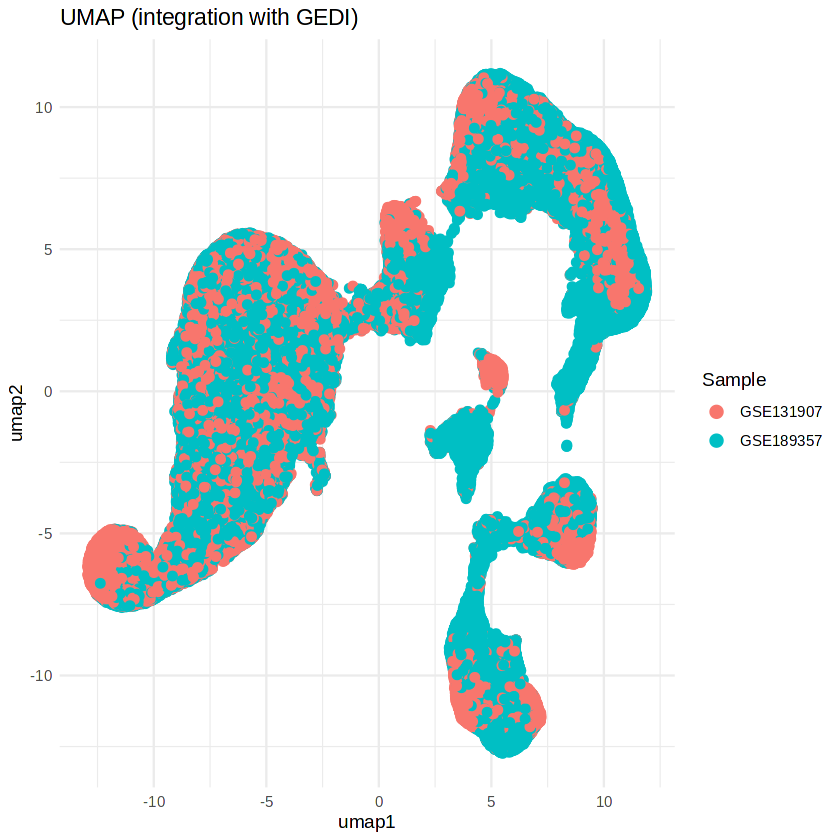

In [14]:
## Plot embeddings
plot_embedding( umap_2_res, model$aux$colData$GEO, size_point=2) + labs(x="umap1", y="umap2", title="UMAP (integration with GEDI)", color="Sample")